In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
dataset1 = pd.read_csv("E://Deep Learning//Exp-1.csv")
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [15]:
# Name: Keerthivasan K S
# Register Number: 212224230120
class Neuralnet(nn.Module):
   def __init__(self):
        super().__init__()
        self.n1=nn.Linear(1,10)
        self.n2=nn.Linear(10,20)
        self.n3=nn.Linear(20,1)
        self.relu=nn.ReLU()
        self.history={'loss': []}
   def forward(self,x):
        x=self.relu(self.n1(x))
        x=self.relu(self.n2(x))
        x=self.n3(x)
        return x

In [20]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain=Neuralnet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [23]:
# Name: Keerthivasan K S
# Register Number: 212224230120
def train_model(ai_brain,x_train,y_train,criteria,optmizer,epochs=4000):
    for i in range(epochs):
        optimizer.zero_grad()
        loss=criterion(ai_brain(x_train),y_train)
        loss.backward()
        optimizer.step()
        
        ai_brain.history['loss'].append(loss.item())
        if i%200==0:
            print(f"Epoch [{i}/epochs], loss: {loss.item():.6f}")

In [24]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/epochs], loss: 0.067241
Epoch [200/epochs], loss: 0.067241
Epoch [400/epochs], loss: 0.067236
Epoch [600/epochs], loss: 0.067238
Epoch [800/epochs], loss: 0.067239
Epoch [1000/epochs], loss: 0.067236
Epoch [1200/epochs], loss: 0.067238
Epoch [1400/epochs], loss: 0.067238
Epoch [1600/epochs], loss: 0.067230
Epoch [1800/epochs], loss: 0.067236
Epoch [2000/epochs], loss: 0.067234
Epoch [2200/epochs], loss: 0.067228
Epoch [2400/epochs], loss: 0.067232
Epoch [2600/epochs], loss: 0.067227
Epoch [2800/epochs], loss: 0.067231
Epoch [3000/epochs], loss: 0.067228
Epoch [3200/epochs], loss: 0.067226
Epoch [3400/epochs], loss: 0.067225
Epoch [3600/epochs], loss: 0.067224
Epoch [3800/epochs], loss: 0.067222


In [25]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 2.790673


In [26]:
loss_df = pd.DataFrame(ai_brain.history)

Name: Keerthivasan K S
Reg No: 212224230120


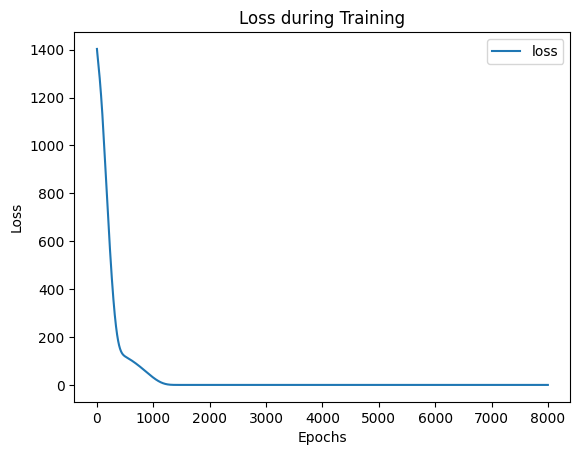

In [28]:
import matplotlib.pyplot as plt
loss_df.plot()
print("Name: Keerthivasan K S\nReg No: 212224230120")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [29]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 40.66228103637695
